In [1]:
import numpy as np
from sif.kernels import SquaredExponentialKernel, MaternKernel
from sif.models import GaussianProcess

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Create random data.

In [3]:
X = np.random.normal(size=(150, 1))
y = np.random.normal(np.cos(3.*X) / (np.abs(X) + 1.), 0.2)
X_pred = np.atleast_2d(np.linspace(-3., 3., num=500)).T

Create the Gaussian process object.

In [4]:
length_scales = np.array([0.5, ])
gp = GaussianProcess(SquaredExponentialKernel(length_scales), 1.)
gp.fit(X, y)

Now we will produce the posterior expectation and variance of the Gaussian process under a fixed hyperparameter configuration. In this section, we'll also draw samples from the predictive posterior distribution of the Gaussian process.

In [5]:
mean_pred, cov_pred = gp.predict(X_pred)
std_pred = np.sqrt(np.diag(cov_pred))
n_samples = 1000
samples = gp.sample(X_pred, n_samples)

Visualize how well the samples conform to the expectation and variance characterization of the posterior.

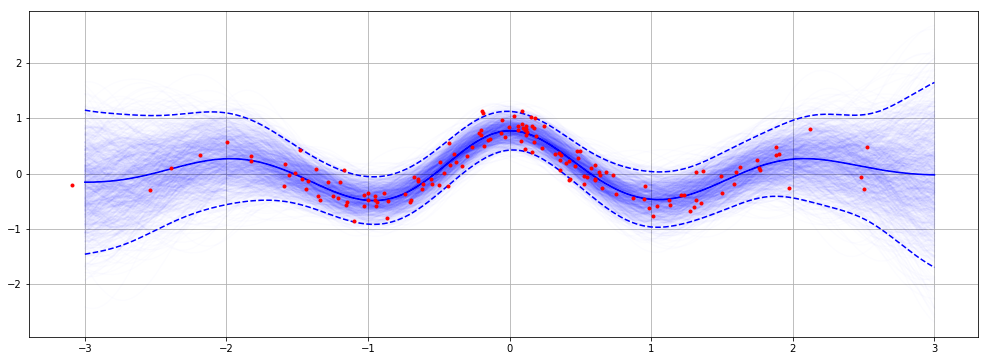

In [6]:
plt.figure(figsize=(17, 6))
plt.plot(X_pred.ravel(), mean_pred.ravel(), "b-")
plt.plot(X_pred.ravel(), mean_pred.ravel() + 2. * std_pred, "b--")
plt.plot(X_pred.ravel(), mean_pred.ravel() - 2. * std_pred, "b--")
for i in range(n_samples):
    plt.plot(X_pred.ravel(), samples[i], "b-", alpha=0.01)
plt.plot(X.ravel(), y.ravel(), "r.")
plt.grid()
plt.show()